<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Additivity of Mean and Variance Demonstration

### Summation and Subtraction of Random Variables Tutorial

* demonstrate the practical impact of summation or subtraction of distributions

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

#### Additivity of Mean and Variance

What is the impact of adding or subtracting random variables on the resulting distributions?

* means and variances are additive! This is quite a powerful concept that is applied in many aspects of Data Science, including time series and spatial data decomposition of trend and residual, variogram modeling, etc.

Let's use the concept of statistical expectation to derive the relationships for adding and subtracting random variables.

* given 2 random variables, $X$ and $Y$, of any distribution, for addition the expectation is:

\begin{equation}
E \{X + Y\} = E\{X\} + E\{Y\}
\end{equation}

* and for substraction the expectation is:

\begin{equation}
E \{X - Y\} = E\{X\} - E\{Y\}
\end{equation}

Since statistical expectation is a linear operator, the central tendency for adding and subtracting random variables is quite straightforward.

Now let's write our measure of dispersion, variance, in terms of statistical expectation.

\begin{equation}
\sigma^2_{X} = E\{\left(X\right)^2\} - \left( E\{X\} \right)^2
\end{equation}

we can substitute the addition of 2 random variables with:

\begin{equation}
\sigma^2_{X+Y} = E\{\left(X+Y\right)^2\} - \left( E\{X + Y\} \right)^2
\end{equation}

once again since expectation is a linear operator, $E \{X + Y\} = E\{X\} + E\{Y\}$ we get this:

\begin{equation}
\sigma^2_{X+Y} = E\{\left(X+Y\right)^2\} - \left( E\{X\} + E\{Y\} \right)^2
\end{equation}

Let's expand the quadratic terms on both sides:

\begin{equation}
\sigma^2_{X+Y} = E\{X^2 + 2XY +Y^2\} - E\{X\}^2 - 2 E\{X\}E\{Y\} - E\{Y\}^2
\end{equation}

Once again we can use linearity of the expection, $E\{X^2 + 2XY +Y^2\} = E\{X^2\} + E\{2XY\} + E\{Y^2\}$. 

\begin{equation}
\sigma^2_{X+Y} = E\{X^2\} + E\{2XY\} + E\{Y^2\} - E\{X\}^2 - 2 E\{X\}E\{Y\} - E\{Y\}^2
\end{equation}

We can group our terms like this:

\begin{equation}
\sigma^2_{X+Y} = E\{X^2\} - E\{X\}^2 + E\{Y^2\} - E\{Y\}^2 + 2 E\{XY\} - 2 E\{X\}E\{Y\}
\end{equation}

and we can see that this can be expressed in terms of variance and covariance as:

\begin{equation}
\sigma^2_{X+Y} = \sigma^2_X + \sigma^2_Y + 2 C_{X,Y}
\end{equation}

If X and Y are independent, then the covariance, $C_{X,Y} \rightarrow 0$, and we can simplify the equation to:

\begin{equation}
\sigma^2_{X+Y} = \sigma^2_X + \sigma^2_Y + 2 C_{X,Y}
\end{equation}

and for the case of subtracting two random variables, $X - Y$, it can be easily shown that the relationship becomes:

\begin{equation}
\sigma^2_{X+Y} = \sigma^2_X + \sigma^2_Y - 2 C_{X,Y}
\end{equation}

and for the case of no correlation between $X$ and $Y$ we can use the same relationship as for the case of addition of two random variables:

\begin{equation}
\sigma^2_{X+Y} = \sigma^2_X + \sigma^2_Y
\end{equation}

#### Objective 

Now that we have provided the derrivations for adding and subtracting random variables, I provide a example and demonstration with 2 random variables:

* the analytical and emprical result for comparison
* visualization of the univariate and bivariate distributions

#### Getting Started

Here's the steps to get setup in Python:

* Install Anaconda 3 on your machine (https://www.anaconda.com/download/).  

#### Load the Required Libraries

The following code loads the required libraries.

In [4]:
import numpy as np                                                # arrays
import scipy as sp                                                # statistical distributions
import matplotlib.pyplot as plt                                   # plotting

##### Build a Simple Bivariate Distribution

First we build a simple bivariate distribution for random varibles $X$ and $Y$. 

* we use the bivariate Gaussian distribution for convenience, but the derived equations for entral tendency and dispersion are general for any distribution.

We draw L realizations from the bivariate distribution and plot the histograms and scatter plot.

* below I use sample statistic instead of population statistic notation to indicate that the imperical result is based on a limited sample size 

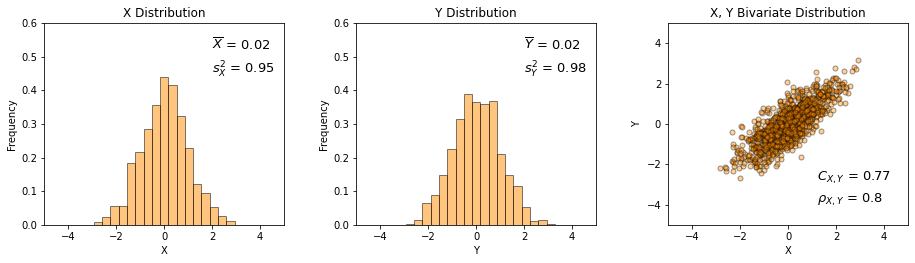

In [5]:
mean_X = 0.0; mean_Y = 0.0                                        # parameters for distribution
var_X = 1.0; var_Y = 1.0; cov_XY = 0.8
n = 1000                                                          # number of samples
seed = 13

np.random.seed(seed = seed)
R = np.random.multivariate_normal([mean_X,mean_Y],np.array([[var_X,cov_XY],[cov_XY,var_Y]]),size=n)
X = R[:,0]; Y = R[:,1]

xmin = -5; xmax = 5; nbins = 30                                    # plotting parameters

plt.subplot(131)                                                   # annotated histogram of X
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='darkorange',density = True)
plt.annotate('$\overline{X}$ = ' + str(np.round(np.average(X),2)),(2.0,0.52),fontsize = 13)
plt.annotate('$s^2_X$ = ' + str(np.round(np.var(X),2)),(2.0,0.45),fontsize = 13)
plt.xlabel('X'); plt.xlim([xmin,xmax])
plt.ylabel('Frequency'); plt.ylim([0,0.6])
plt.title('X Distribution') 

plt.subplot(132)                                                   # annotated histogram of Y
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='darkorange',density = True)
plt.annotate('$\overline{Y}$ = ' + str(np.round(np.average(Y),2)),(2.0,0.52),fontsize = 13)
plt.annotate('$s^2_Y$ = ' + str(np.round(np.var(Y),2)),(2.0,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('Y'); 
plt.ylabel('Frequency'); plt.ylim([0,0.6])
plt.title('Y Distribution') 

plt.subplot(133)                                                   # annotated scatter plot of X and Y
plt.scatter(X,Y,color='darkorange',alpha=0.4,edgecolor='black',s=25)
plt.xlim([xmin,xmax]); plt.ylim([xmin,xmax])
plt.annotate(r'$C_{X,Y}$ = ' + str(np.round(np.cov(R,rowvar=False)[0,1],2)),(1.2,-2.8),fontsize = 13)
plt.annotate(r'$\rho_{X,Y}$ = ' + str(np.round(np.corrcoef(R,rowvar=False)[0,1],2)),(1.2,-3.9),fontsize = 13)
plt.xlabel('X'); plt.ylabel('Y'); plt.title('X, Y Bivariate Distribution')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.7, wspace=0.3, hspace=0.4) # plot formatting
plt.show()

#### Empirical and Analytical Results for Additivity of Variance

Now we add and subtract the random variables and compare the central tendency and dispersion of the result with the result predicted from the analytical relationship derived above.

Let's predict the outcome given the statistcs above for a random seed of 13:

For addition, $X + Y$.

\begin{equation}
E\{X\} + E\{Y\} = E \{X + Y\}
\end{equation}

\begin{equation}
 0.02 + 0.02 = 0.04
\end{equation}

\begin{equation}
\sigma^2_X + \sigma^2_Y + 2 \cdot C_{X,Y} = \sigma^2_{X+Y}
\end{equation}

\begin{equation}
0.95 + 0.98 + 2 \cdot 0.77 = 3.46
\end{equation}

and for subtraction:

\begin{equation}
E\{X\} - E\{Y\} = E \{X - Y\}
\end{equation}

\begin{equation}
 0.02 - 0.02 = 0.00
\end{equation}

\begin{equation}
\sigma^2_X + \sigma^2_Y - 2 \cdot C_{X,Y} = \sigma^2_{X+Y}
\end{equation}

\begin{equation}
0.95 + 0.98 - 2 \cdot 0.77 = 0.39
\end{equation}

Let's add and subtract $X$ and $Y$ and check the empirical results with the analytical result above from theory.

* note we denote the analytical solution with a $*$, e.g., $E \{X - Y\}^*$ and $s^{2*}_{X - Y}$.

The use of a limited sample size will result in some error in the results.

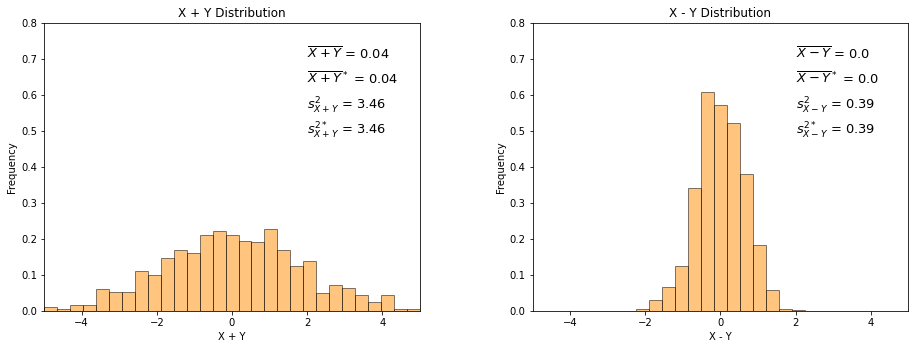

In [8]:
Z = X + Y                                                         # add the random variables
Z2 = X - Y                                                        # subtract the random variables

plt.subplot(121)
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='darkorange',density = True)
plt.annotate('$\overline{X + Y}$ = ' + str(np.round(np.average(Z),2)),(2.0,0.7),fontsize = 13)
plt.annotate('$\overline{X + Y}^*$ = ' + str(np.round(np.average(X) + np.average(Y),2)),(2.0,0.63),fontsize = 13)
plt.annotate('$s^2_{X + Y}$ = ' + str(np.round(np.var(Z),2)),(2.0,0.56),fontsize = 13)
plt.annotate('$s^{2*}_{X + Y}$ = ' + str(np.round(np.var(X)+np.var(Y)+2*np.cov(R,rowvar=False)[0,1],2)),(2.0,0.49),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('X + Y'); 
plt.ylabel('Frequency'); plt.ylim([0,0.8])
plt.title('X + Y Distribution') 

plt.subplot(122)
plt.hist(x=Z2,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='darkorange',density = True)
plt.annotate('$\overline{X - Y}$ = ' + str(np.round(np.average(Z2),2)),(2.0,0.7),fontsize = 13)
plt.annotate('$\overline{X - Y}^*$ = ' + str(np.round(np.average(X) - np.average(Y),2)),(2.0,0.63),fontsize = 13)
plt.annotate('$s^2_{X - Y}$ = ' + str(np.round(np.var(Z2),2)),(2.0,0.56),fontsize = 13)
plt.annotate('$s^{2*}_{X - Y}$ = ' + str(np.round(np.var(X)+np.var(Y)-2*np.cov(R,rowvar=False)[0,1],2)),(2.0,0.49),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('X - Y'); 
plt.ylabel('Frequency'); plt.ylim([0,0.8])
plt.title('X - Y Distribution') 

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.3, hspace=0.4) # plot formatting
plt.show()

We have a good match. Try oout different random number seeds to observe the error due to limit ed sample size. Also try different sample sizes, increase $n$ to increase the accuracy of the empirical result.

#### Summary Figure for Additivity of Mean and Variance

Let's put everything together in a single figure along with the equations.

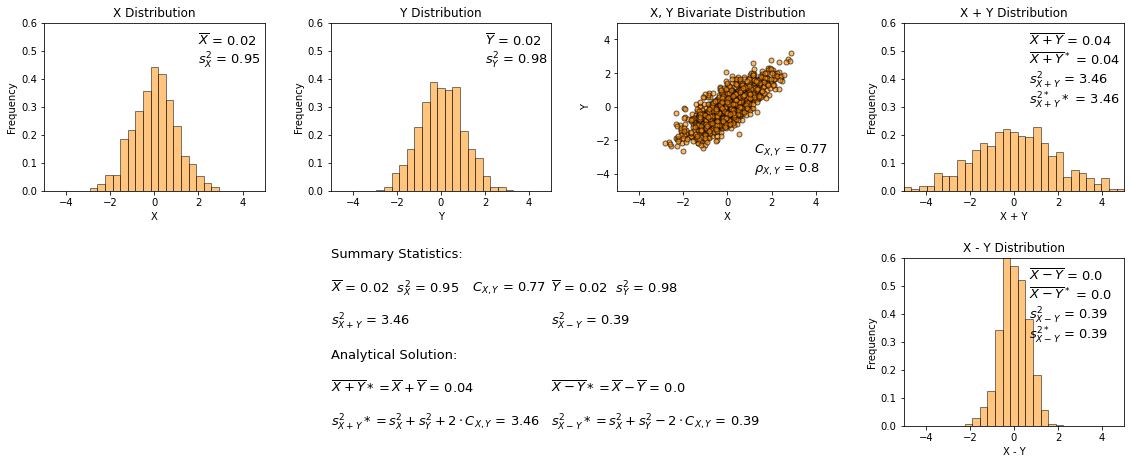

In [9]:
plt.subplot(241)
plt.hist(x=X,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='darkorange',density = True)
plt.annotate('$\overline{X}$ = ' + str(np.round(np.average(X),2)),(2.0,0.52),fontsize = 13)
plt.annotate('$s^2_X$ = ' + str(np.round(np.var(X),2)),(2.0,0.45),fontsize = 13)
plt.xlabel('X'); plt.xlim([xmin,xmax])
plt.ylabel('Frequency'); plt.ylim([0,0.6])
plt.title('X Distribution') 

plt.subplot(242)
plt.hist(x=Y,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='darkorange',density = True)
plt.annotate('$\overline{Y}$ = ' + str(np.round(np.average(Y),2)),(2.0,0.52),fontsize = 13)
plt.annotate('$s^2_Y$ = ' + str(np.round(np.var(Y),2)),(2.0,0.45),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('Y'); 
plt.ylabel('Frequency'); plt.ylim([0,0.6])
plt.title('Y Distribution') 

plt.subplot(243)
plt.scatter(X,Y,color='darkorange',alpha=0.6,edgecolor='black',s=25)
plt.xlim([xmin,xmax]); plt.ylim([xmin,xmax])
plt.annotate(r'$C_{X,Y}$ = ' + str(np.round(np.cov(R,rowvar=False)[0,1],2)),(1.2,-2.8),fontsize = 13)
plt.annotate(r'$\rho_{X,Y}$ = ' + str(np.round(np.corrcoef(R,rowvar=False)[0,1],2)),(1.2,-3.9),fontsize = 13)
plt.xlabel('X'); plt.ylabel('Y'); plt.title('X, Y Bivariate Distribution')

plt.subplot(244)
plt.hist(x=Z,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='darkorange',density = True)
plt.annotate('$\overline{X + Y}$ = ' + str(np.round(np.average(Z),2)),(0.7,0.52),fontsize = 13)
plt.annotate('$\overline{X + Y}^*$ = ' + str(np.round(np.average(X) + np.average(Y),2)),(0.7,0.45),fontsize = 13)
plt.annotate('$s^2_{X + Y}$ = ' + str(np.round(np.var(Z),2)),(0.7,0.38),fontsize = 13)
plt.annotate('$s^{2*}_{X + Y}*$ = ' + str(np.round(np.var(X)+np.var(Y)+2*np.cov(R,rowvar=False)[0,1],2)),(0.7,0.31),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('X + Y'); 
plt.ylabel('Frequency'); plt.ylim([0,0.6])
plt.title('X + Y Distribution') 

plt.subplot(248)
plt.hist(x=Z2,weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.5,edgecolor='black',color='darkorange',density = True)
plt.annotate('$\overline{X - Y}$ = ' + str(np.round(np.average(Z2),2)),(0.7,0.52),fontsize = 13)
plt.annotate('$\overline{X - Y}^*$ = ' + str(np.round(np.average(X) - np.average(Y),2)),(0.7,0.45),fontsize = 13)
plt.annotate('$s^2_{X - Y}$ = ' + str(np.round(np.var(Z2),2)),(0.7,0.38),fontsize = 13)
plt.annotate('$s^{2*}_{X - Y}$ = ' + str(np.round(np.var(X)+np.var(Y)-2*np.cov(R,rowvar=False)[0,1],2)),(0.7,0.31),fontsize = 13)
plt.xlim([xmin,xmax]); plt.xlabel('X - Y'); 
plt.ylabel('Frequency'); plt.ylim([0,0.6])
plt.title('X - Y Distribution') 

ax = plt.subplot(246)
ax.axis('off')
plt.annotate('Summary Statistics:',(0,1.0),fontsize = 13)
plt.annotate(r'$\overline{X}$ = ' + str(np.round(np.average(X),2)) + '  $s^2_{X}$ = ' + str(np.round(np.var(X),2)),(0,0.8),fontsize = 13)
plt.annotate(r'$\overline{Y}$ = ' + str(np.round(np.average(Y),2)) + '  $s^2_{Y}$ = ' + str(np.round(np.var(Y),2)),(1,0.8),fontsize = 13)

plt.annotate(r'$C_{X,Y}$ = ' + str(str(np.round(np.cov(R,rowvar=False)[0,1],2))),(0.64,0.8),fontsize = 13)
plt.annotate(r'$s^2_{X+Y}$ = ' + str(np.round(np.var(Z),2)),(0,0.6),fontsize = 13)
plt.annotate(r'$s^2_{X+Y}* = s^2_{X} + s^2_{Y} + 2 \cdot C_{X,Y}$ = ' + str(np.round(np.var(X) + np.var(Y) + 2 * np.cov(R,rowvar=False)[0,1],2)),(0.0,0.0),fontsize = 13)
plt.annotate(r'$s^2_{X-Y}$ = ' + str(np.round(np.var(Z2),2)),(1.0,0.6),fontsize = 13)
plt.annotate(r'$s^2_{X-Y}* = s^2_{X} + s^2_{Y} - 2 \cdot C_{X,Y}$ = ' + str(np.round(np.var(X) + np.var(Y) - 2 * np.cov(R,rowvar=False)[0,1],2)),(1.0,0.0),fontsize = 13)
plt.annotate('Analytical Solution:',(0,0.4),fontsize = 13)
plt.annotate(r'$\overline{X+Y}* = \overline{X} + \overline{Y}$ = ' + str(np.round(np.average(X) + np.average(Y),2) ),(0.0,0.2),fontsize = 13)
plt.annotate(r'$\overline{X-Y}* = \overline{X} - \overline{Y}$ = ' + str(np.round(np.average(X) - np.average(Y),2) ),(1.0,0.2),fontsize = 13)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=1.4, wspace=0.3, hspace=0.4) # plot formatting
plt.show()

#### Comments

This was a basic demonstration of additivity and subtraction of random variables. This concept is useful for many uncertainty modeling workflows.  

Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)